# Exploring HGCal

Let's take a look at some hgcal data.  First some simple visualizations...

In [1]:
#imports and setup
%matplotlib inline
%cd /home/naodell/work/hgcal/analysis

import sys
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import plotly.plotly as plotly
import plotly.graph_objs as go
from plotly.graph_objs import Surface, Mesh3d
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
    
from scripts.helpers import eta_to_theta, propagate_to_face, assign_phi

%connect_info

/home/naodell/work/hgcal/analysis


ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


In [2]:
# get the data
infile = open('local_data/electron_tc_nominal/output_0.pkl', 'rb')
evts_particles = pickle.load(infile)
evts_cells = pickle.load(infile)

FileNotFoundError: [Errno 2] No such file or directory: 'local_data/electron_tc_nominal/output_0.pkl'

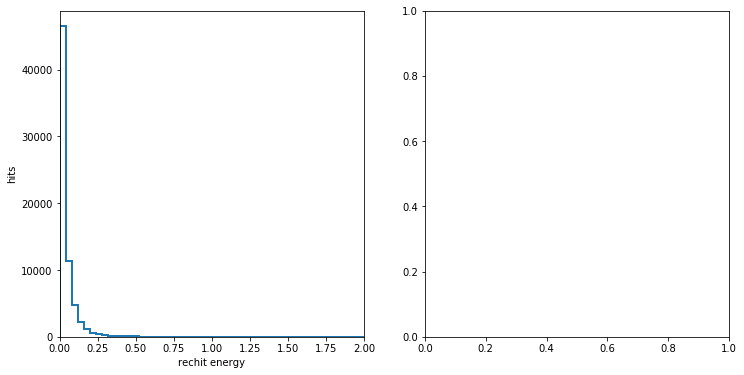

In [5]:
#plt.yscale('log')
fig, axes = plt.subplots(1, 2, figsize=(12,6), sharey=False, facecolor='white')
axes[0].hist(evts_cells[0].pt, range=(0., 2.), bins=50, histtype='step', lw=2)
axes[0].set_xlabel('rechit energy')
axes[0].set_ylabel('hits')
axes[0].set_title('')
axes[0].set_xlim([0., 2.])

#axes[1].hist(evts_cells[0].query('sim_e > 0').sim_e, range=(0., 2.), bins=20, histtype='step', lw=2)
#axes[1].set_xlabel('sim energy')
#axes[1].set_ylabel('hits')
#axes[1].set_title('')
#axes[1].set_xlim(0., )

plt.show()

In [6]:
cells = evts_cells[0].query('z > 0')
sim_cells = evts_cells[0].query('sim_e > 0 and z > 0')
cells['r'] = np.sqrt(cells['x']**2 + cells['y']**2)

particles = evts_particles[0].query('eta > 0')
electron = particles.query('pid == 11').iloc[0]
#gen_face_position = np.array([propagate_to_face(p.theta, p.phi, p.pt, 3.2, 0.14) for i,p in gen_data.iterrows()])
#gen_tail_position = np.array([propagate_to_face(p.theta, p.phi, p.pt, 4.1, 0.14) for i,p in gen_data.iterrows()])

fig, axes = plt.subplots(1, 2, figsize=(16,8), facecolor='white')
ax = axes[0]
ax.plot([electron.ovz, electron.dvz], [electron.ovy, electron.dvy])
ax.scatter(sim_cells.z, sim_cells.y, s=10*sim_cells.sim_e, c='r')
ax.scatter(cells.z, cells.y, s=10*cells.reco_e, c=cells.reco_e, cmap='plasma', alpha=0.05)
ax.set_xlabel('z (cm)')
ax.set_ylabel('y (cm)')
ax.set_xlim([285., 340.])
ax.set_ylim([-100., -50.])

#axes[1].scatter(100.*gen_face_position[:,0], 100.*gen_face_position[:,1], marker='*', c='k')
#axes[1].scatter(100.*gen_tail_position[:,0], 100.*gen_tail_position[:,1], marker='>', c='k')
axes[1].scatter(sim_cells.x, sim_cells.y, s=sim_cells.z - 315, c=np.exp(10*sim_cells.sim_e), cmap='Wistia', alpha=0.95)
axes[1].scatter(cells.x, cells.y, c=cells.reco_e, cmap='plasma', alpha=0.05)
axes[1].set_xlabel('x (cm)')
axes[1].set_ylabel('y (cm)')
axes[1].set_xlim([-100., 0.])
axes[1].set_ylim([-100., -60.])

plt.show()

UndefinedVariableError: name 'sim_e' is not defined

In [ ]:
#from skimage.feature import blob_doh
#blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

In [47]:
zvals = ['z'].unique()
zvals.sort()
fig, axes = plt.subplots(7, 7, facecolor='white', figsize=(20, 20), sharey=True, sharex=True)

e_by_layer = []
for i, plane in enumerate(zvals):
    row, col = i/7, i%7
    df = scan_data.query('z == {0}'.format(plane))
    e_by_layer.append(np.sum(df.e))
    e_cum = np.sum(e_by_layer)
    
    axes[row][col].scatter(df.x, df.y, c=df.e, s=40*df.e, marker='8')
    axes[row][col].set_xlim(10,60)
    axes[row][col].set_ylim(30,100)
    
    axes[row][col].text(33,74, r'$\sum E_{{z}}$ = {0:.2f}'.format(e_cum))
    axes[row][col].text(35,82, r'$E_{{z}}$ = {0:.2f}'.format(np.sum(df.e)))
    axes[row][col].text(35,90, 'z = {0:.1f}'.format(plane))

plt.show()

NameError: name 'scan_data' is not defined